### Day Number 1

My first step in learning Machine Learning 

1. Converting Celsius to Farenheit model

In [20]:
import tensorflow as tf

import numpy as np

Note: Removed the logger since it was removed from the newer version of TensorFlow

In [21]:
celcius_q = np.array ([-40, -10, 0, 8, 15, 22, 38], dtype=float)
farenheit_a = np.array ([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i, c in enumerate(celcius_q):
    print("{} degrees Celcius = {} degrees Fahrenheit".format(c, farenheit_a[i]))

-40.0 degrees Celcius = -40.0 degrees Fahrenheit
-10.0 degrees Celcius = 14.0 degrees Fahrenheit
0.0 degrees Celcius = 32.0 degrees Fahrenheit
8.0 degrees Celcius = 46.0 degrees Fahrenheit
15.0 degrees Celcius = 59.0 degrees Fahrenheit
22.0 degrees Celcius = 72.0 degrees Fahrenheit
38.0 degrees Celcius = 100.0 degrees Fahrenheit


#### Some Machine Learning Terminology

- Feature = The input(s) to our model. In this case, a single value -- the degrees in Celsius
- Labels  = The output our model predicts. In this case, a single value -- the degrees in Fahrenheit
- Example = A pair of inputs/outputs used during training. In our case a pair of values from celsius_q and fahrenheit_a at a specific index, such as (22, 72)

#### Create the model

Next create the model. We will use simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron

##### Build a layer

We'll call the layer ten and create it by instantiating th.keras.layers.Dense with the following configuration

- input_shape = [1] -- This specifies that the input to this layer is a single value. That is, the shape of the one-dimensional array with one member. Since this is the first (and only) layer, that input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

- units = 1 -- This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final, it is also the size of the model's output -- a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the later would need to match the input_shape of the next layer)

In [22]:
ten = tf.keras.layers.Dense(units=1, input_shape=[1])

#### Assemble layers into the model

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as arguments, specifying the calculation order from the input to the output

This model has just a single layer, ten

In [23]:
model = tf.keras.Sequential([ten])


Note 

You will often see the layers defined inside the model definition, rather than beforehand:

```
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape[1])
])
```

#### Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training the model is given:
- Loss function -- A way of measuring how far off predictions are from desired outcome. (The measured difference is called the "loss").
- Optimizer function -- A way of adjusting internal values in order to reduce the loss.

In [24]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

These are used during training(model.fit(), below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is. 

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables  until the model (which is really a math function) mirrors the actual equation for converting Celsius to Fahrenheit

TensorFlow uses numerical analysis to perform this tuning, and all this complexity is hidden from you so we will not go into the details here. What is useful to know about these parameters are:

The loss function (mean_squared_error) and the optimizer (Adam) used here are standard for simple models like this one, but many others are available. It is not important how these specific functions work at this point.

One part of the Optimizer you may need to think about is when building your own models is the learning rate (0.1 in the code above). This is the step size taken when adjusting values in the model. If value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default) and 0.1

#### Train the model

Train the model by calling the fit method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and output values which are meant to be the Fahrenheiht equivalent. Since the weights are initially set randomly, the output wil not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted. 

This cycle of calculate, compare, adjust is controlled by the fit method. The first argument is the inputs, the second argument is the desired outputs. The epochs argument specifies how many times this cycle should be run, and the verbose argument controls how much output the method produces.

In [25]:
history = model.fit(celcius_q, farenheit_a, epochs=500, verbose=False)
print("Finished Training the model")

Finished Training the model


#### Display training statistics

The fit method returns a history object. We can use this object to plot how the loss of our models goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in fahrenheit_a.

We'll use matplotlib to visualize this (you could use another tool). As you can see, our model improves quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.

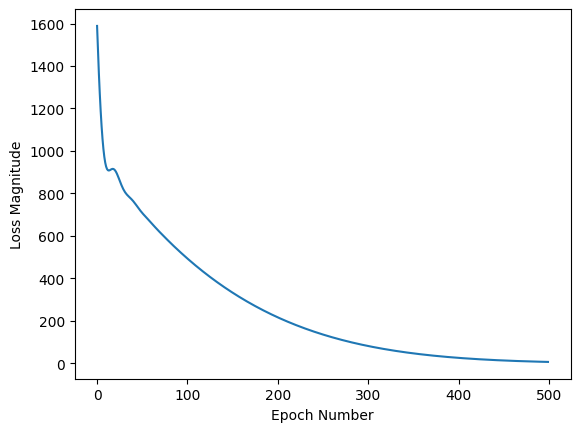

In [26]:
import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

#### Use the model to predict values

Now you have a model that has been trained to learn the relationship between celsius_q and fahrenheit_a. You can use the predict method to have it calculate the Fahrenheit degrees for a previously unknown Celsius degrees.

So, for example, if the celsius value is 200, what do you think the Fahrenheit result will be?

In [32]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 35ms/step
[[211.33626]]


The correct answer is 100 x 1.8 + 32 = 212 so our model is doing pretty well

To review
- We created a model with a Dense Layer
- We trained it with 3500 examples (7 pairs, over 500 epochs)

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of our training data)

#### Looking the layer weights

Finally, let's print the internal variables of the Dense Layer

In [28]:
print("These are the layer variables: {}".format(ten.get_weights()))

These are the layer variables: [array([[1.8208097]], dtype=float32), array([29.25528], dtype=float32)]


The first variable is close to 1.8 and the second is close to 32. The actual variables in the real conversion formula